## Regresión logística multiclase

[Curso de Regresión Logística con Python y scikit-learn](platzi.com/reglog)


## Importar librerías


In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

## Carga de datos


In [2]:
df = pd.read_csv('data/Dry_Bean.csv')

In [3]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
df.shape

(13611, 17)

In [6]:
df.Class.value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

## Drop duplicates


In [7]:
df.drop_duplicates(inplace=True)
df.shape

(13543, 17)

## Manejo de datos nulos


In [8]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

## undersampling

Balancear el dataset


<Axes: xlabel='Class'>

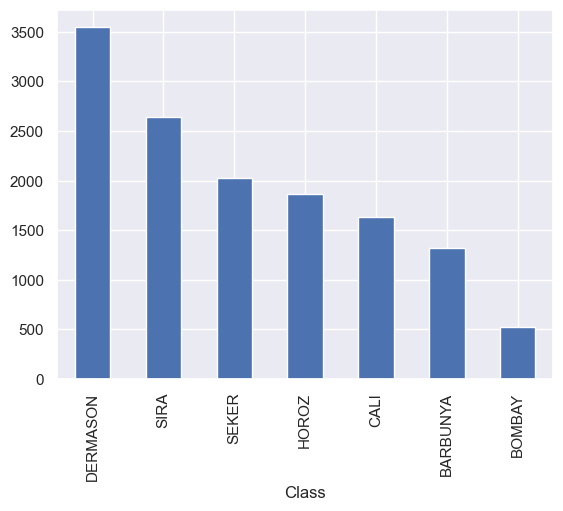

In [9]:
df.Class.value_counts().plot(kind='bar')

El dataset está desbalanceado. Podemos hacer alguna de estas dos cosas para arreglarlo:

1. Reducir todas las clases a la frecuencia de la más baja. (undersampling)
2. Amplificar todas las clases a la frecuencia de la más alta con la misma desviación estándar.

En este caso vamos por la primera opción porque la clase de menor frecuencia tiene suficientes ejemplos para entrenar (<500).


In [12]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

In [13]:
x = df.drop('Class', axis=1)
y = df.Class

In [14]:
x_over, y_over = undersample.fit_resample(x, y)

<Axes: xlabel='Class'>

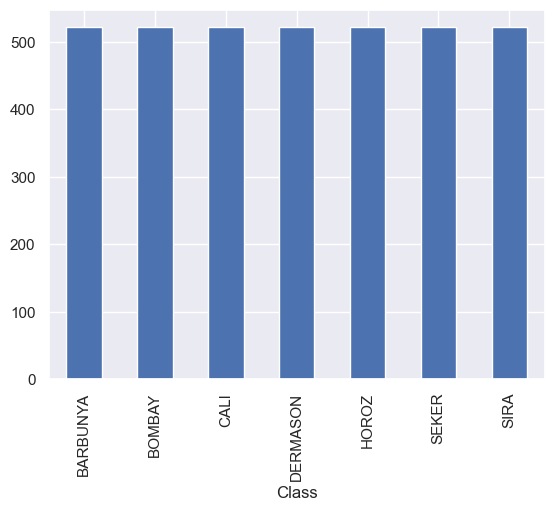

In [16]:
y_over.value_counts().plot(kind='bar')

In [17]:
df.shape

(13543, 17)

In [18]:
x_over.shape

(3654, 16)

## Conversión a numéricos


In [19]:
classes = list(np.unique(y_over))
print(classes)

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']


In [20]:
y_over.replace(classes, [1, 2, 3, 4, 5, 6, 7], inplace=True)

In [21]:
list(np.unique(y_over))

[1, 2, 3, 4, 5, 6, 7]

## Análisis exploratorio de datos


In [22]:
df_exp = x_over
df_exp['Class'] = y_over

### Corrrelations


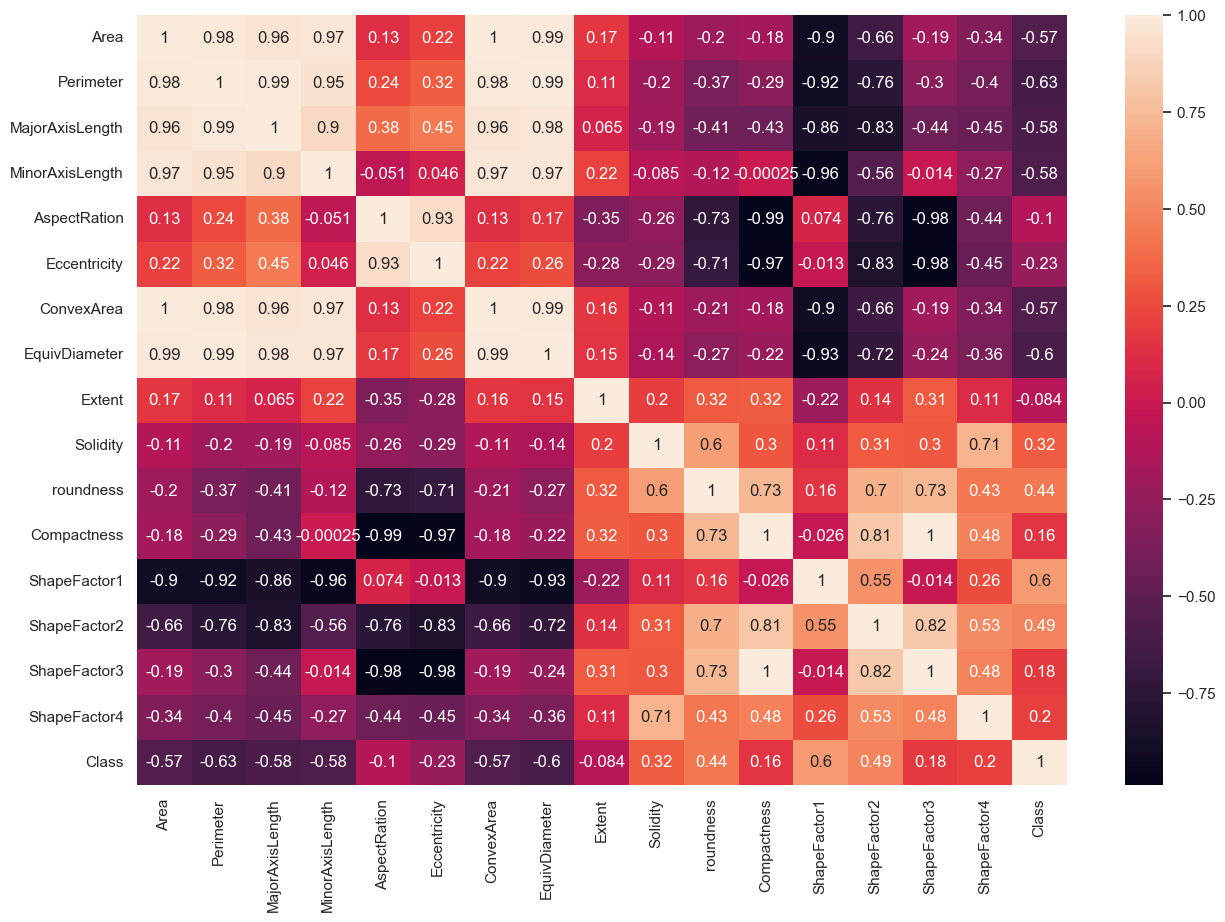

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_exp.corr(), annot=True)
plt.show()

In [24]:
x_over.drop(['ConvexArea', 'EquivDiameter'], axis=1, inplace=True)
# Estos dos datos están demasiado correlacionados a otros.
# Pueden causar overfitting.

## Visualización de datos


/Users/afbolivarg/miniconda3/envs/ds-base/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/afbolivarg/miniconda3/envs/ds-base/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/afbolivarg/miniconda3/envs/ds-base/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/afbolivarg/miniconda3/envs/ds-base/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

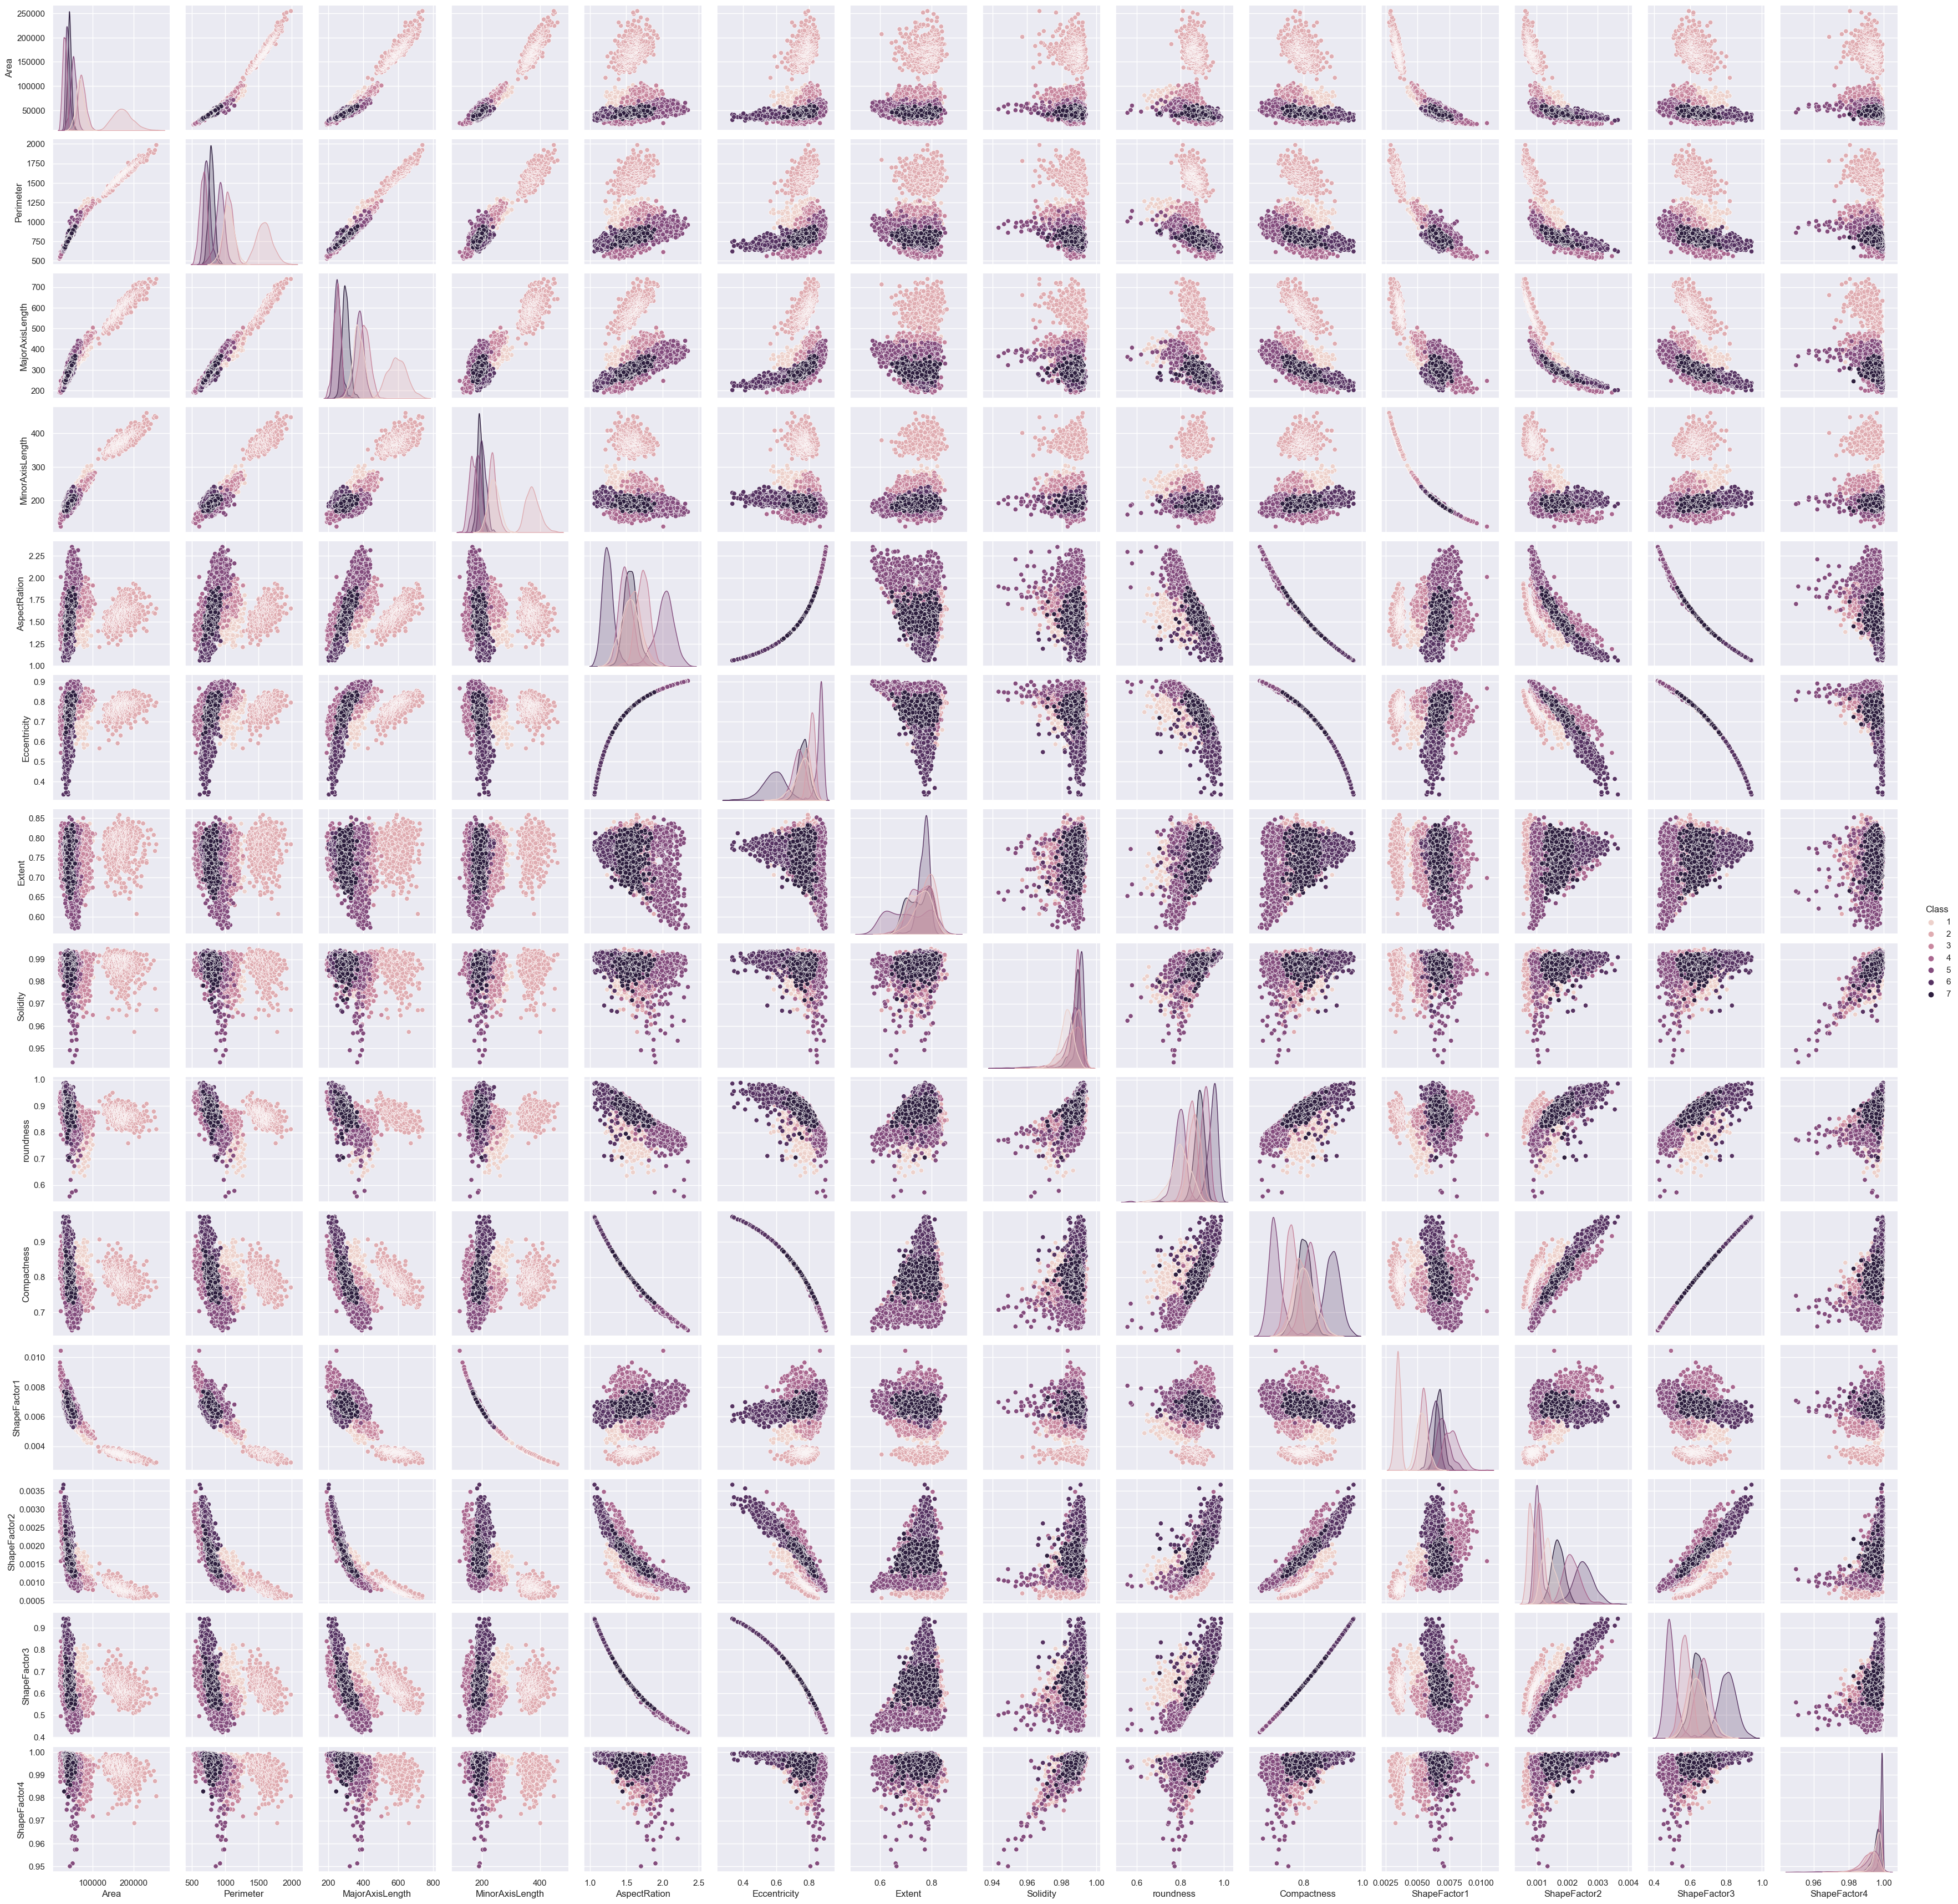

In [25]:
sns.pairplot(df_exp, hue='Class')

## Split y escalamiento de datos


In [26]:
x_train, x_test, y_train, y_test = train_test_split(
    x_over, y_over, random_state=42, shuffle=True, test_size=0.2)

In [27]:
# entrenamos el escalador solo con los datos de test para evitar un data leak.
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

## Modelo multiclase


In [37]:
def logistic_model(solver, multiclass, C):
    return LogisticRegression(random_state=42, solver=solver, multi_class=multiclass, n_jobs=-1, C=C)

In [47]:
model = logistic_model('saga', 'multinomial', 1)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
cm = confusion_matrix(y_test, predictions)
print(cm)
print(accuracy_score(y_test, predictions))

[[128   0   0   0   0   0   0]
 [  0  98   0   0   0   0   0]
 [  0   0 102   1   0   0   0]
 [  0   0   0 105   0   0   0]
 [  0   0   1   1  94   0   0]
 [  0   0   0   0   0  89   2]
 [  0   0   0   0   0   0 110]]
0.9931600547195623


/Users/afbolivarg/miniconda3/envs/ds-base/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [42]:
multiclass = ['ovr', 'multinomial']
solvers = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
scores = []
params = []

for i in multiclass:
    for j in solvers:
        try:
            model = logistic_model(j, i, 1)
            model.fit(x_train, y_train)
            predictions = model.predict(x_test)
            params.append(f'{i} - {j}')
            scores.append(accuracy_score(y_test, predictions))
        except:
            pass

/Users/afbolivarg/miniconda3/envs/ds-base/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(
/Users/afbolivarg/miniconda3/envs/ds-base/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/afbolivarg/miniconda3/envs/ds-base/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/afbolivarg/miniconda3/envs/ds-base/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/afbolivarg/miniconda3/envs/ds-base/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reach

## Evaluación de resultados


/Users/afbolivarg/miniconda3/envs/ds-base/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


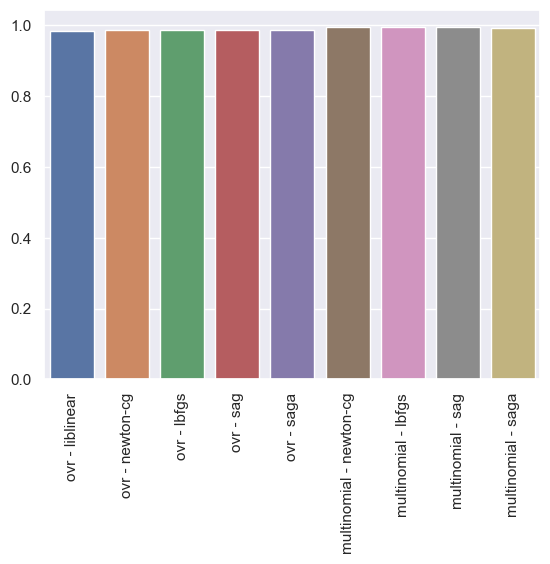

In [46]:
sns.barplot(x=params, y=scores)
plt.xticks(rotation=90)
plt.show()

In [48]:
model = logistic_model('newton-cg', 'multinomial', 1)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
cm = confusion_matrix(y_test, predictions)
print(cm)
print(accuracy_score(y_test, predictions))

[[128   0   0   0   0   0   0]
 [  0  98   0   0   0   0   0]
 [  0   0 102   1   0   0   0]
 [  0   0   0 105   0   0   0]
 [  0   0   1   1  94   0   0]
 [  0   0   0   0   0  90   1]
 [  0   0   0   0   0   0 110]]
0.9945280437756497


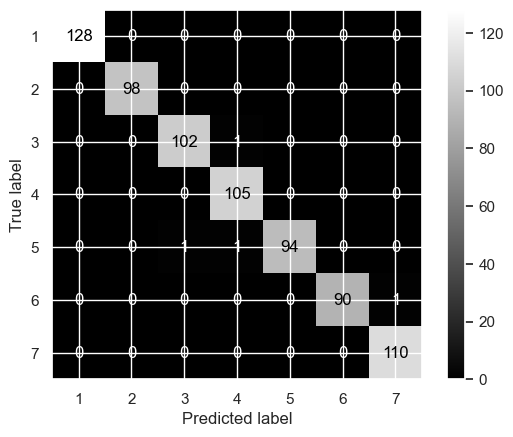

In [49]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()